# SAS Workbench Python Speed Test

This program creates data and tests algorithm speed between Scikit and Workbench.

# Load Packages

In [1]:
import os
from time import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import pickle
import warnings
warnings.filterwarnings('ignore')

# Create Data

In [2]:
# Number of Observations and Parameters (including intercept)
n = 100000
p = 100

# Simulate Betas
np.random.seed(802)
betas = np.random.rand(p, 1)

# Set Some Parameters to Zero
indices = np.random.choice(np.arange(betas.size), replace=False,size=int(betas.size * 0.25))
betas[indices] = 0

# Simulate Design Matrix
ones = np.ones(n)
X = np.random.rand(n, p)*2 -1
X[:,0] = ones

# Simulate Binary Target
logit = np.dot(X, betas)
probs = 1 / (1 + np.exp(-logit))
y = np.random.binomial(1, probs.flatten())

In [3]:
y_values = ["0", "1"]
y_counts = [sum(y==0), sum(y==1)]

print("Binary Target Counts")
pd.DataFrame({"Values":y_values, "Counts":y_counts})

Binary Target Counts


,Values,Counts
0,0,44387
1,1,55613


In [4]:
probs_values = ["<0.2",">0.2 & <0.4",">0.4 & <0.6",">0.6 & <0.8",">0.8"]
probs_counts = [int(sum(probs<0.2)),
                int(sum((probs>0.2)&(probs<0.4))),
                int(sum((probs>0.2)&(probs<0.6))),
                int(sum((probs>0.6)&(probs<0.8))),
                int(sum(probs>0.8))]

print("Probability Frequency Bins")
pd.DataFrame({"Values":probs_values, "Counts":probs_counts})

Probability Frequency Bins


,Values,Counts
0,<0.2,26101
1,>0.2 & <0.4,11963
2,>0.4 & <0.6,22911
3,>0.6 & <0.8,13169
4,>0.8,37819


In [5]:
df = pd.DataFrame(X)
df.iloc[:,0] = y

col_names = ["y"]+["x"+str(i) for i in range(1,p)]
df.columns = col_names

target = col_names[0]
var_names = col_names[1:]

df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1.0,-0.422021,-0.716684,-0.339113,-0.599777,-0.060327,0.820908,0.381677,0.062725,0.411206,...,-0.597010,-0.834304,0.199486,-0.869590,0.101231,0.438357,0.608505,0.386817,-0.407379,-0.279693
1,0.0,0.609866,-0.742245,-0.941684,-0.607458,0.162208,-0.479175,0.586259,-0.442373,0.107531,...,-0.374099,-0.074563,-0.154223,-0.850112,0.313504,0.379226,0.809461,0.628099,-0.279487,-0.781208
2,1.0,0.770605,-0.654871,-0.296419,-0.974439,0.928791,-0.297538,0.169023,0.348689,0.853711,...,0.158433,-0.157385,-0.680647,0.184237,-0.680255,-0.109919,0.087569,-0.824921,0.240995,-0.075995
3,0.0,0.697582,0.410296,-0.130901,0.000194,0.992162,-0.448741,0.433442,-0.694547,-0.369041,...,0.085689,-0.939385,-0.734869,0.468383,0.484502,0.020588,0.491116,0.145070,-0.862005,-0.100637
4,0.0,-0.701354,0.155171,-0.716007,0.613888,0.752849,0.113859,-0.144649,-0.113170,-0.863548,...,-0.168689,-0.063046,-0.903517,0.076829,0.447929,-0.519725,-0.189231,0.524759,-0.730973,-0.260579


# Partition Data

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(
     df[var_names], df[target], test_size=0.25, random_state=802)

In [7]:
print("Training Observations =",X_train.shape[0], "\n", "Validation Observations =",X_valid.shape[0])

Training Observations = 75000 
 Validation Observations = 25000


# Build Models with Sklearn

In [8]:
# dummies_train = pd.get_dummies(X_train[nom_vars])
# X_train_dummies = pd.concat([X_train, dummies_train], axis=1)
# X_train_dummies = X_train_dummies.drop(nom_vars, axis=1)

# dummies_valid = pd.get_dummies(X_valid[nom_vars])
# X_valid_dummies = pd.concat([X_valid, dummies_valid], axis=1)
# X_valid_dummies = X_valid_dummies.drop(nom_vars, axis=1)

In [9]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [10]:
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble

[Sklearn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [11]:
lr_mod_py = sklearn.linear_model.LogisticRegression(penalty=None, dual=False, tol=1e-4, C=1, fit_intercept=True, 
                                                   intercept_scaling=1, class_weight=None, random_state=None,
                                                   solver="lbfgs", max_iter=100, multi_class="auto", verbose=0,
                                                   warm_start=False, n_jobs=-1, l1_ratio=None)

t0_lr_py = time()
lr_mod_py.fit(X_train, y_train)
t1_lr_py = time()

[Sklearn Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [12]:
dt_mod_py = sklearn.tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, min_samples_split=2,
                                               min_samples_leaf=5, min_weight_fraction_leaf=0, max_features="sqrt",
                                               random_state=None, max_leaf_nodes=None, min_impurity_decrease=0,
                                               class_weight=None, ccp_alpha=0)

t0_dt_py = time()
dt_mod_py.fit(X_train, y_train)
t1_dt_py = time()

[Sklearn Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [13]:
rf_mod_py = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, 
                                                    min_samples_split=2, min_samples_leaf=5, min_weight_fraction_leaf=0, 
                                                    max_features="sqrt", max_leaf_nodes=None, min_impurity_decrease=0, 
                                                    bootstrap=True, oob_score=False, n_jobs=-1, random_state=None, 
                                                    verbose=0, warm_start=False, class_weight=None, ccp_alpha=0, 
                                                    max_samples=None)

t0_rf_py = time()
rf_mod_py.fit(X_train, y_train)
t1_rf_py = time()

[Sklearn Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [14]:
gb_mod_py = sklearn.ensemble.GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, 
                                                        subsample=0.5, criterion='friedman_mse', min_samples_split=2, 
                                                        min_samples_leaf=5, min_weight_fraction_leaf=0, max_depth=5, 
                                                        min_impurity_decrease=0, init="zero", random_state=None, 
                                                        max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                                                        validation_fraction=0.1, n_iter_no_change=1000, tol=1e-4, ccp_alpha=0.0)

t0_gb_py = time()
gb_mod_py.fit(X_train, y_train)
t1_gb_py = time()

# Build Models in SAS

In [15]:
# from sasviya.ml.linear_model import LogisticRegression
# from sasviya.ml.tree import DecisionTreeClassifier, ForestClassifier, GradientBoostingClassifier

In [16]:
import sasviya.ml.linear_model
import sasviya.ml.tree

[SAS Viya Logistic Regression](https://go.documentation.sas.com/doc/en/workbenchcdc/2.0/explore/n0110bswc89wqjn1tht4ceu4hs7y.htm)

In [17]:
lr_mod_sas = sasviya.ml.linear_model.LogisticRegression(tol=1e-4, fit_intercept=True, solver="lbfgs", 
                                                        selection=None, max_iter=100, max_time=None, verbose=0)

t0_lr_sas = time()
lr_mod_sas.fit(X_train, y_train)
t1_lr_sas = time()

[SAS Viya Decision Tree](https://go.documentation.sas.com/doc/en/workbenchcdc/2.0/explore/p14rqs4yfhf5bcn1js9nlfgzx795.htm)

In [18]:
dt_mod_sas = sasviya.ml.tree.DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5,
                                                    ccp_alpha=0, verbose=0)

t0_dt_sas = time()
dt_mod_sas.fit(X_train, y_train)
t1_dt_sas = time()

[SAS Viya Random Forest](https://go.documentation.sas.com/doc/en/workbenchcdc/2.0/explore/p04zhxjh60eutqn1t40f0104gw42.htm)

In [19]:
rf_mod_sas = sasviya.ml.tree.ForestClassifier(n_estimators=100, bootstrap=1, criterion="gini", max_depth=10,
                                              max_features=None, min_samples_leaf=5, n_bins=5, oob_score=False,
                                              random_state=None, verbose=0)

t0_rf_sas = time()
rf_mod_sas.fit(X_train, y_train)
t1_rf_sas = time()

[SAS Viya Gradient Boosting](https://go.documentation.sas.com/doc/en/workbenchcdc/2.0/explore/n1kiea90s0276wn1xr0ig0hvkix6.htm)

In [20]:
gb_mod_sas = sasviya.ml.tree.GradientBoostingClassifier(min_samples_leaf=5, n_bins=5, n_estimators=100, max_depth=5,
                                                        max_features=None, learning_rate=0.1, subsample=0.5, l1_penalty=0,
                                                        l2_penalty=0, random_state=None, verbose=0, n_iter_no_change=1000,
                                                        tol=1e-4, calc_feature_importances=False, validation_fraction=0.1)

t0_gb_sas = time()
gb_mod_sas.fit(X_train, y_train)
t1_gb_sas = time()

# Compare Times

In [21]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

sas_times = [round(t1_lr_sas-t0_lr_sas,2),
             round(t1_dt_sas-t0_dt_sas,2),
             round(t1_rf_sas-t0_rf_sas,2),
             round(t1_gb_sas-t0_gb_sas,2)]

py_times = [round(t1_lr_py-t0_lr_py,2),
            round(t1_dt_py-t0_dt_py,2),
            round(t1_rf_py-t0_rf_py,2),
            round(t1_gb_py-t0_gb_py,2)]

speed_diff = list(np.array(py_times)/np.array(sas_times))

comp_times = {

    "Models":models,

    "SAS Times (Seconds)":sas_times,

    "Python Times (Seconds)": py_times,

    "Speed_Factor (Py/SAS)":speed_diff
}

print("Speed test between SAS and Python for {:,} observations and {} variables.".format(n,p))
pd.DataFrame(comp_times)

Speed test between SAS and Python for 100,000 observations and 100 variables.


,Models,SAS Times (Seconds),Python Times (Seconds),Speed_Factor (Py/SAS)
0,Logistic Regression,0.76,1.07,1.407895
1,Decision Tree,5.29,1.01,0.190926
2,Random Forest,14.62,16.39,1.121067
3,Gradient Boosting,20.96,246.46,11.758588


# Assess Models

In [22]:
models = {"Logistic Regression SAS":lr_mod_sas,
          "Decision Tree SAS":dt_mod_sas,
          "Random Forest SAS":rf_mod_sas,
          "Gradient Boosting SAS":gb_mod_sas,
          "Logistic Regression Py":lr_mod_py,
          "Decision Tree Py":dt_mod_py,
          "Random Forest Py":rf_mod_py,
          "Gradient Boosting Py":gb_mod_py}

In [23]:
preds = {}
for key in models:
    preds[key] = models[key].predict(X_valid)

In [24]:
conf_mats = {}
for key in preds:
    conf_mats[key] = confusion_matrix(y_valid, preds[key]).ravel()

conf_mats["Metric"] = ["TN","FP","FN","TP"]
pd.DataFrame(conf_mats)

,Logistic Regression SAS,Decision Tree SAS,Random Forest SAS,Gradient Boosting SAS,Logistic Regression Py,Decision Tree Py,Random Forest Py,Gradient Boosting Py,Metric
0,8889,5577,5392,7817,8888,5934,5777,7907,TN
1,2220,5532,5717,3292,2221,5175,5332,3202,FP
2,1988,3928,1269,2097,1989,4534,1113,2066,FN
3,11903,9963,12622,11794,11902,9357,12778,11825,TP


In [25]:
acc = {}
for key in models:
    acc[key] = models[key].score(X_valid, y_valid)
    
pd.DataFrame({"Model":acc.keys(), "Accuracy":list(acc.values())}).sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,Logistic Regression SAS,0.83168
4,Logistic Regression Py,0.83160
7,Gradient Boosting Py,0.78928
3,Gradient Boosting SAS,0.78444
6,Random Forest Py,0.74220
2,Random Forest SAS,0.72056
1,Decision Tree SAS,0.62160
5,Decision Tree Py,0.61164


In [26]:
probs = {}
for key in models:
    probs[key] = np.array(models[key].predict_proba(X_valid))[:,1]

In [27]:
auc = {}
fpr_tpr = {}
for key in probs:
    auc[key] = roc_auc_score(y_valid, probs[key])
    fpr_tpr[key] = roc_curve(y_valid, probs[key])

pd.DataFrame({"Model":auc.keys(), "AUC":list(auc.values())}).sort_values(by="AUC", ascending=False)

,Model,AUC
4,Logistic Regression Py,0.915201
0,Logistic Regression SAS,0.915200
7,Gradient Boosting Py,0.873317
3,Gradient Boosting SAS,0.869819
6,Random Forest Py,0.848535
2,Random Forest SAS,0.820291
1,Decision Tree SAS,0.656000
5,Decision Tree Py,0.640802


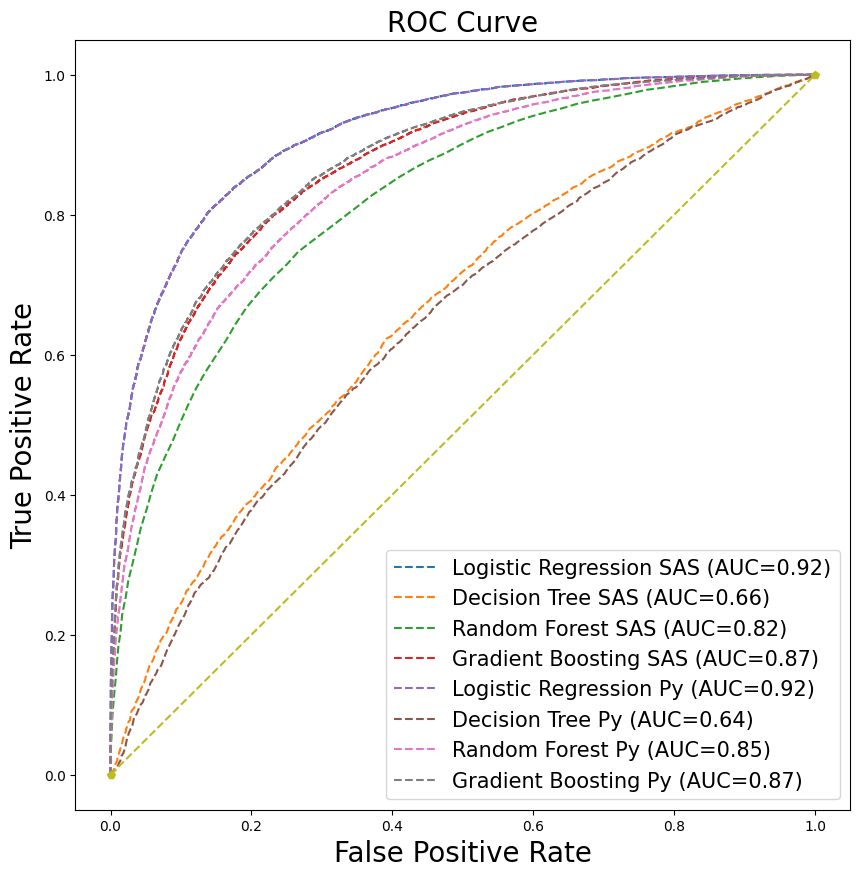

In [28]:
plt.figure(figsize = (10, 10))

for key in auc:
    plt.plot(fpr_tpr[key][0], fpr_tpr[key][1], linestyle='--', label=key+" (AUC=%0.2f)"%(auc[key]))

plt.plot([0, 1], [0, 1],'p--')
plt.xlabel("False Positive Rate", fontsize = 20)
plt.ylabel("True Positive Rate", fontsize = 20)
plt.title("ROC Curve", fontsize = 20)
plt.legend(loc="lower right", fontsize = 15)
plt.show()